# 7.8.1  Polynomial Regression and Step Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

Wage = pd.read_csv('Wage.csv', header=0, na_values='NA')
print(Wage.shape)
Wage.head()

(3000, 12)


,Unnamed: 0,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [2]:
# https://github.com/qx0731/ISL_python/blob/master/Chapter_7_sec_7.8.ipynb?fbclid=IwAR2HGKKmhuAwanFov0IZPDu8ZL1IyTeB0-EbuOvr6wqFRT5N5JMpyh71dSM
Y = Wage.wage 
X = Wage.age

X = np.asarray(X).reshape(-1,1)
Y = np.asarray(Y).reshape(-1,1)

polynomial_features= PolynomialFeatures(degree=4)
X_poly = polynomial_features.fit_transform(X)

reg = LinearRegression().fit(X_poly,Y)


In [3]:
print(reg.intercept_)
print(reg.coef_)

[-184.15417975]
[[ 0.00000000e+00  2.12455205e+01 -5.63859313e-01  6.81068771e-03
  -3.20383038e-05]]


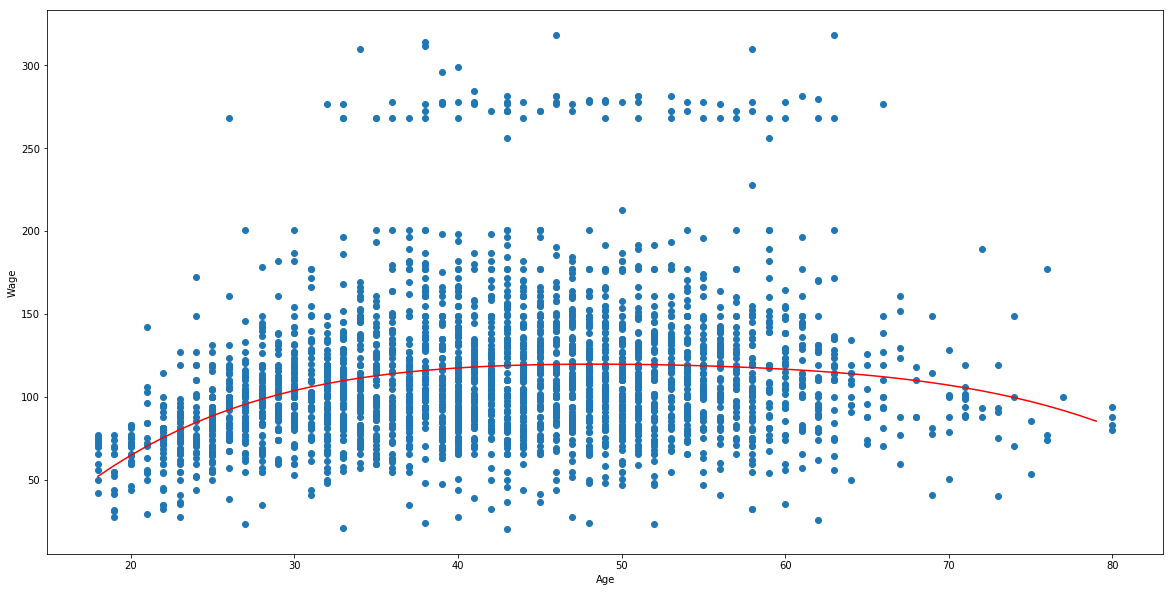

In [16]:
# generate a sequence of age values spanning the range
age_grid = np.arange(Wage.age.min(), Wage.age.max()).reshape(-1,1)

# generate test data use PolynomialFeatures and fit_transform
X_test = PolynomialFeatures(degree=4).fit_transform(age_grid)

# predict the value of the generated ages
y_pred = reg.predict(X_test)

# creating plot for left side of figure 7.1
plt.figure(figsize=(20,10))
plt.plot(X,Y,'o')
plt.plot(age_grid, y_pred, color='red')
plt.xlabel('Age')
plt.ylabel('Wage')

plt.show()

In [5]:
# 1. grad
X1= PolynomialFeatures(degree=1).fit_transform(X)
fit1 = sm.GLS(Y,X1).fit()

#2. grad
X2= PolynomialFeatures(degree=2).fit_transform(X)
fit2 = sm.GLS(Y,X2).fit()

# 3. grad
X3= PolynomialFeatures(degree=3).fit_transform(X)
fit3 = sm.GLS(Y,X3).fit()

# 4. grad 
fit4 = sm.GLS(Y,X_poly).fit()

#5. grad
X5= PolynomialFeatures(degree=5).fit_transform(X)
fit5 = sm.GLS(Y,X5).fit()

In [6]:
print(sm.stats.anova_lm(fit1,fit2,fit3,fit4,fit5))
# Pr(>F) tells us what type of polynomial is sufficient, here 4. degree polynomial is sufficient because p value 
# is approximately 5%. 5. degree polynominal is also good, because the p value is 37%.  
# Because the fourth is enough the fifth is unnecessary. 

   df_resid           ssr  df_diff        ss_diff           F        Pr(>F)
0    2998.0  5.022216e+06      0.0            NaN         NaN           NaN
1    2997.0  4.793430e+06      1.0  228786.010128  143.593107  2.363850e-32
2    2996.0  4.777674e+06      1.0   15755.693664    9.888756  1.679202e-03
3    2995.0  4.771604e+06      1.0    6070.152124    3.809813  5.104620e-02
4    2994.0  4.770322e+06      1.0    1282.563017    0.804976  3.696820e-01


C:\Users\diteh\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\diteh\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\diteh\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [7]:
# We consider the task of predicting whether an individual earns more than $250,000 per year.
logistic_model = sm.GLM((Y>250), X_poly, family=sm.families.Binomial())
logistic_fit = logistic_model.fit()
print(logistic_fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2995
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -350.61
Date:                Fri, 29 Mar 2019   Deviance:                       701.22
Time:                        15:19:38   Pearson chi2:                 3.70e+03
No. Iterations:                    10   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -109.5530     47.655     -2.299      0.022    -202.956     -16.150
x1             8.9950      4.187      2.148      0.0

Text(0, 0.5, 'Pr(wage>250|age)')

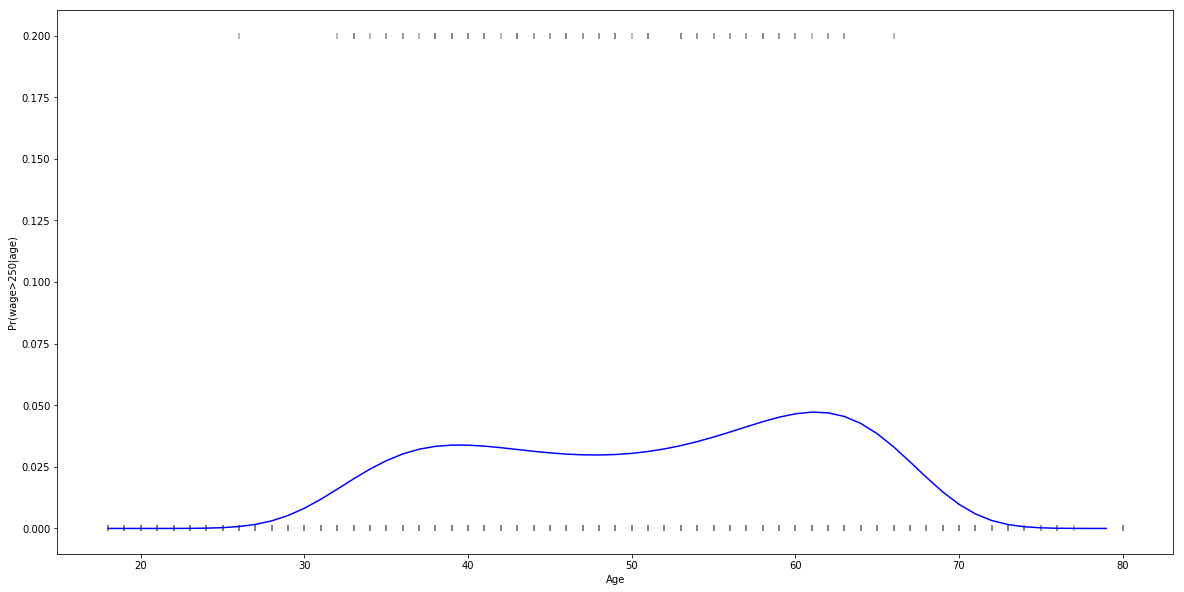

In [17]:
# creating plot for right side of figure 7.1 
# https://nbviewer.jupyter.org/github/JWarmenhoven/ISL-python/blob/master/Notebooks/Chapter%207.ipynb
X4 = PolynomialFeatures(4).fit_transform(Wage.age.values.reshape(-1,1))
y = (Wage.wage > 250).map({False:0, True:1}).values

clf = sm.GLM(y, X4, family=sm.families.Binomial(sm.families.links.logit))
res = clf.fit()

X_test = PolynomialFeatures(4).fit_transform(age_grid)
pred = res.predict(X_test)

plt.figure(figsize=(20,10))
plt.plot(age_grid, pred, color='b')
plt.scatter(Wage.age, y/5, s=30, c='grey', marker='|', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Pr(wage>250|age)')

# 7.8.2 Splines

In [9]:
from patsy import dmatrix 
# creating knots at age 25, 40, 60. 
spline_basis1 = dmatrix("bs(Wage.age, knots=(25,40,60), degree=3, include_intercept=False)", 
                        {"Wage.age": Wage.age}, return_type='dataframe')


In [10]:
spline_fit1 = sm.GLM(Wage.wage, spline_basis1).fit()
spline_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   wage   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2993
Model Family:                Gaussian   Df Model:                            6
Link Function:               identity   Scale:                          1594.0
Method:                          IRLS   Log-Likelihood:                -15314.
Date:                Fri, 29 Mar 2019   Deviance:                   4.7708e+06
Time:                        15:19:38   Pearson chi2:                 4.77e+06
No. Iterations:                     3   Covariance Type:             nonrobust
==========================================================================================================================================
                                                                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                 60.4937      9.460      6.394      0.000      41.952      79.036
bs(Wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[0]     3.9805     12.538      0.317      0.751     -20.593      28.554
bs(Wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[1]    44.6310      9.626      4.636      0.000      25.764      63.498
bs(Wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[2]    62.8388     10.755      5.843      0.000      41.759      83.919
bs(Wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[3]    55.9908     10.706      5.230      0.000      35.007      76.975
bs(Wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[4]    50.6881     14.402      3.520      0.000      22.461      78.915
bs(Wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[5]    16.6061     19.126      0.868      0.385     -20.881      54.093
==========================================================================================================================================
"""

In [11]:
# Letting the code automatically choose the knots.
spline_basis2 = dmatrix("bs(Wage.age, df=6, include_intercept=False)",
                        {"Wage.age": Wage.age}, return_type='dataframe')
spline_fit2 = sm.GLM(Wage.wage, spline_basis2).fit()
spline_fit2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   wage   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2993
Model Family:                Gaussian   Df Model:                            6
Link Function:               identity   Scale:                          1592.5
Method:                          IRLS   Log-Likelihood:                -15313.
Date:                Fri, 29 Mar 2019   Deviance:                   4.7662e+06
Time:                        15:19:39   Pearson chi2:                 4.77e+06
No. Iterations:                     3   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         56.3138      7.258      7.759      0.000      42.088      70.539
bs(Wage.age, df=6, include_intercept=False)[0]    27.8240     12.435      2.238      0.025       3.453      52.195
bs(Wage.age, df=6, include_intercept=False)[1]    54.0625      7.127      7.585      0.000      40.093      68.032
bs(Wage.age, df=6, include_intercept=False)[2]    65.8284      8.323      7.909      0.000      49.515      82.142
bs(Wage.age, df=6, include_intercept=False)[3]    55.8127      8.724      6.398      0.000      38.714      72.911
bs(Wage.age, df=6, include_intercept=False)[4]    72.1315     13.745      5.248      0.000      45.192      99.071
bs(Wage.age, df=6, include_intercept=False)[5]    14.7509     16.209      0.910      0.363     -17.018      46.519
==================================================================================================================
"""

In [12]:
# Another way again: 
spline_basis3 = dmatrix("cr(Wage.age, df=4)", {"Wage.age": Wage.age}, return_type='dataframe')
spline_fit3 = sm.GLM(Wage.wage, spline_basis3).fit()
spline_fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   wage   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2996
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                          1596.4
Method:                          IRLS   Log-Likelihood:                -15318.
Date:                Fri, 29 Mar 2019   Deviance:                   4.7827e+06
Time:                        15:19:39   Pearson chi2:                 4.78e+06
No. Iterations:                     3   Covariance Type:             nonrobust
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                79.6421      1.773     44.918      0.000      76.167      83.117
cr(Wage.age, df=4)[0]   -14.6678      3.436     -4.269      0.000     -21.402      -7.934
cr(Wage.age, df=4)[1]    36.8111      1.950     18.881      0.000      32.990      40.632
cr(Wage.age, df=4)[2]    35.9349      2.056     17.476      0.000      31.905      39.965
cr(Wage.age, df=4)[3]    21.5639      6.989      3.085      0.002       7.865      35.263
=========================================================================================
"""

In [13]:
# Predictions
pred1 = spline_fit1.predict(dmatrix("bs(age_grid, knots=(25,40,60), include_intercept=False)",{"age_grid": age_grid}, return_type='dataframe'))
pred2 = spline_fit2.predict(dmatrix("bs(age_grid, df=6, include_intercept=False)",{"age_grid": age_grid}, return_type='dataframe'))
pred3 = spline_fit3.predict(dmatrix("cr(age_grid, df=4)", {"age_grid": age_grid}, return_type='dataframe'))

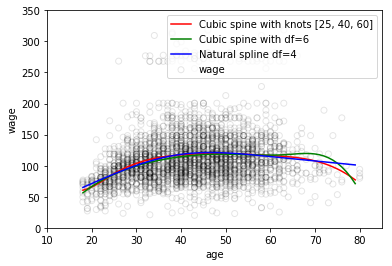

In [14]:
# Plotting the splines using the different predictions. 
plt.scatter(Wage.age, Wage.wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(age_grid, pred1, color='r', label='Cubic spine with knots [25, 40, 60]')
plt.plot(age_grid, pred2, color='g', label='Cubic spine with df=6')
plt.plot(age_grid, pred3, color='b', label='Natural spline df=4')
plt.legend()
plt.xlim(10,85)
plt.ylim(0,350)
plt.xlabel('age')
plt.ylabel('wage')
plt.show()